In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the datasets
zomato_data = pd.read_csv("D:\Documents New Updated\Zomato\zomato.csv", encoding='latin1')
zomato_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [ ]:
# Country Code dataset
country_code = pd.read_excel("D:\Documents New Updated\Zomato\Country-Code.xlsx")
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
# Merge datasets on 'Country Code'
zomato_merged = pd.merge(zomato_data, country_code, on='Country Code', how='left')

In [ ]:
zomato_merged.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
# Step 1: Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(zomato_merged.isnull().sum())

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [ ]:
# Fill missing values in the 'Cuisines' column with 'Unknown'
zomato_merged['Cuisines'].fillna('Unknown', inplace=True)

In [ ]:
print("Missing values in each column:")
print(zomato_merged.isnull().sum())

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [ ]:
zomato_merged.isnull().sum().sum()

0

In [ ]:
# Check for duplicate entries and drop them if found
if zomato_merged.duplicated().sum() > 0:
    zomato_merged.drop_duplicates(inplace=True)

In [ ]:
zomato_merged.duplicated().sum()

0

In [ ]:
# Checking data types
print("\nData Types:")
print(zomato_merged.dtypes)


Data Types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object


In [ ]:
# Overall Information of Dataset
print("\nDataset Information:")
print(zomato_merged.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15 

In [ ]:
# Step 2: Basic Overview - Statistics
print("\nBasic Statistics of Numerical columns:")
zomato_merged.describe()


Basic Statistics of Numerical columns:


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
# Step 2: Basic Overview - Stats
print("\nBasic Statistics of Categorical columns:")
zomato_merged.describe(include = 'object')


Basic Statistics of Categorical columns:


,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1826,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737,8652


In [ ]:
# Top 5 Countries with Most Restaurants
print("\nTop 5 Countries with Most Restaurants:\n")
print(zomato_merged['Country'].value_counts().head())


Top 5 Countries with Most Restaurants:

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
Name: Country, dtype: int64


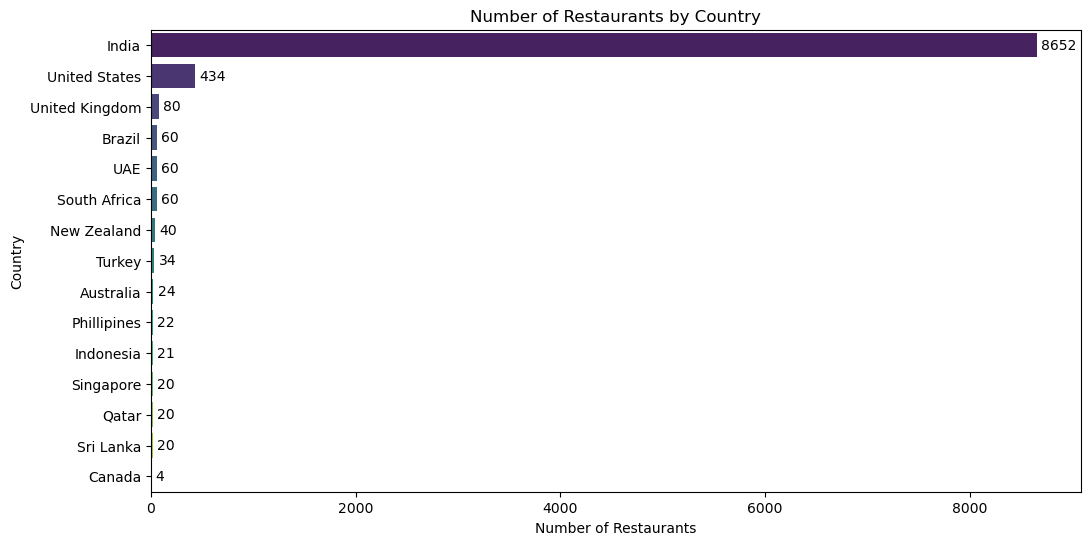

In [ ]:
# Step 3: Visualizing Distributions and Relationships

# Country-wise restaurant distribution with data labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=zomato_merged, y='Country', order=zomato_merged['Country'].value_counts().index, palette='viridis')
plt.title('Number of Restaurants by Country')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', padding = 3, fontsize = 10)

plt.show()

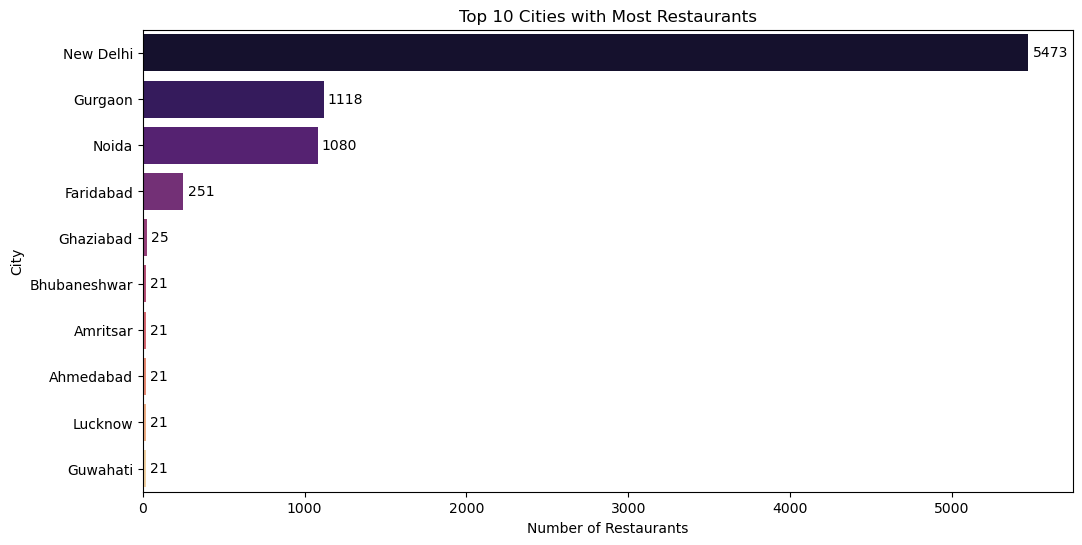

In [ ]:
# Top 10 cities with the most number of restaurants
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=zomato_merged, y='City', order=zomato_merged['City'].value_counts().head(10).index, palette='magma')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.show()

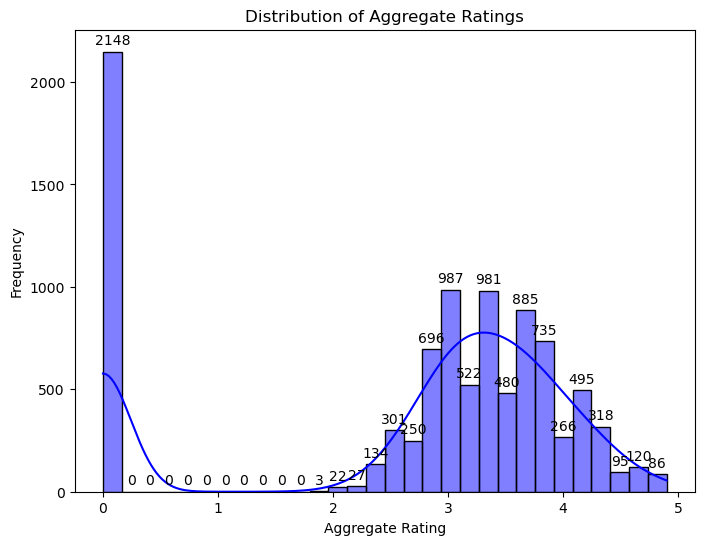

In [ ]:
# Distribution of Aggregate Ratings - (Probability Distribution)
plt.figure(figsize=(8, 6))
ax = sns.histplot(zomato_merged['Aggregate rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.show()

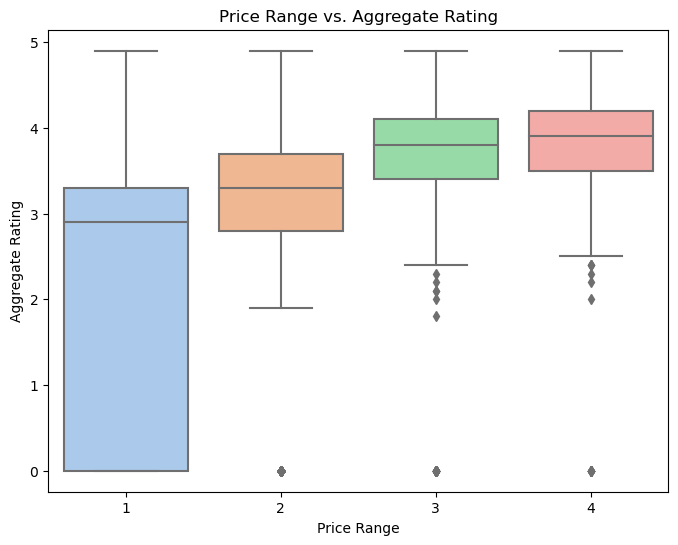

In [ ]:
# Price Range vs. Aggregate Rating
plt.figure(figsize=(8, 6))
sns.boxplot(data=zomato_merged, x='Price range', y='Aggregate rating', palette='pastel')
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')

plt.show()

### 1. Higher Price Range, Higher Ratings:
#### Restaurants in higher price ranges (3 and 4) generally have higher median ratings compared to those in lower price ranges (1 and 2).
#### This suggests that expensive restaurants tend to provide better-rated services or experiences.

### 2. Wider Rating Range for Low-Price Restaurants:
#### Restaurants in price range 1 show a wider spread of ratings, with some receiving very low ratings and others receiving high ratings.
#### This indicates variability in the quality of services among budget-friendly restaurants.

### 3. Narrow Spread for Higher Price Ranges:
#### Price ranges 3 and 4 have a narrower interquartile range (IQR), indicating that most of the ratings are clustered around a higher median.
#### Customers tend to have more consistent experiences with expensive restaurants.

### 4. Outliers:
#### There are a few outliers in the higher price ranges, where ratings are unusually low.
#### This could reflect customer dissatisfaction despite high prices.

### 5. Price Range 2 vs. Price Range 1:
#### Restaurants in price range 2 generally have slightly better median ratings compared to those in price range 1, suggesting an improvement in quality as prices increase.

In [ ]:
# Cuisines Analysis - Most popular cuisines with data labels
top_cuisines = zomato_merged['Cuisines'].str.split(', ').explode().value_counts().head(10)

top_cuisines

North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: Cuisines, dtype: int64

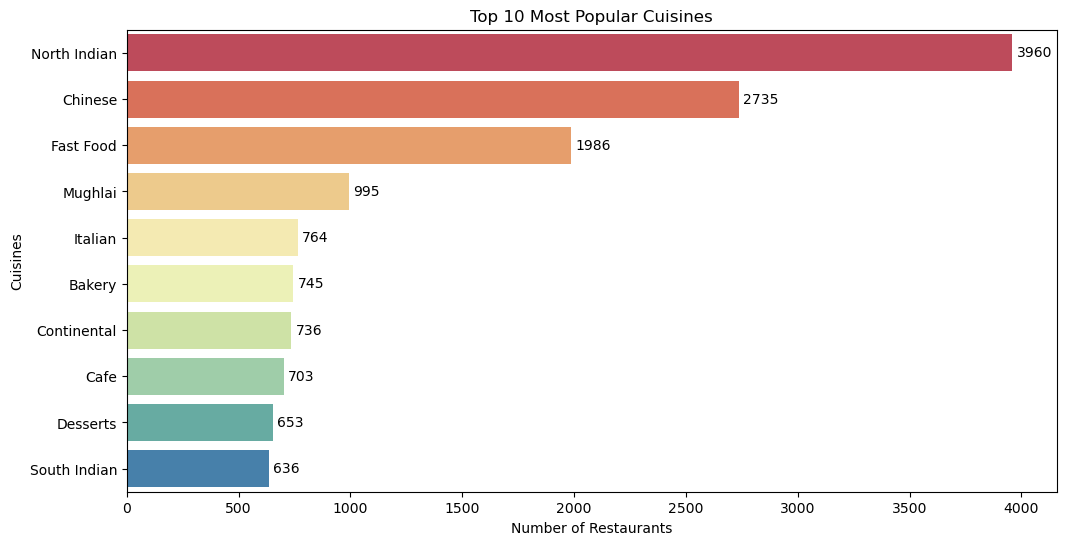

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='Spectral')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.show()

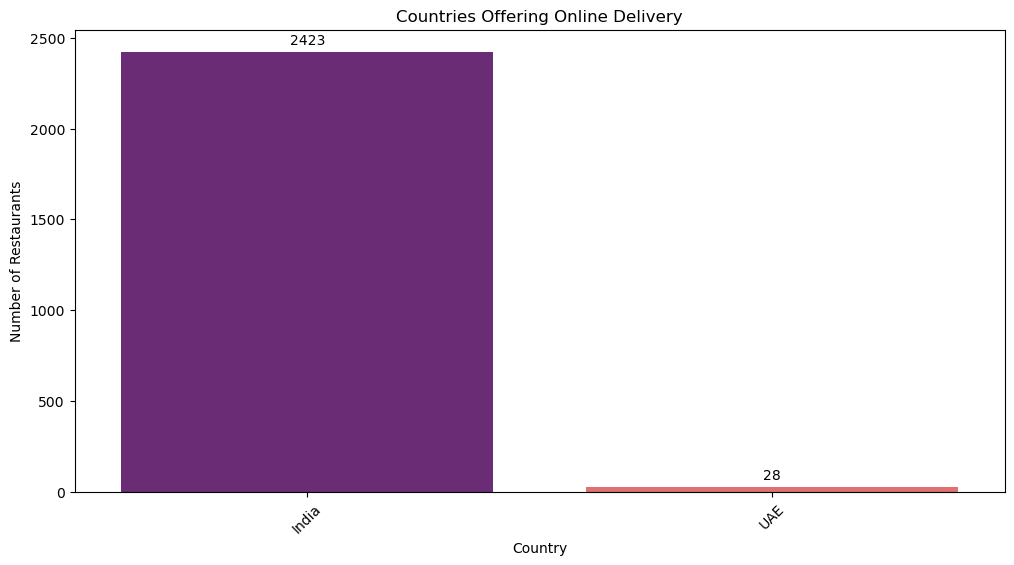

In [ ]:
# Step 4: Advanced Insights
# Analyze restaurants offering online delivery across countries
online_delivery = zomato_merged[zomato_merged['Has Online delivery'] == 'Yes']['Country'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=online_delivery.index, y=online_delivery.values, palette='magma')
plt.title('Countries Offering Online Delivery')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.show()

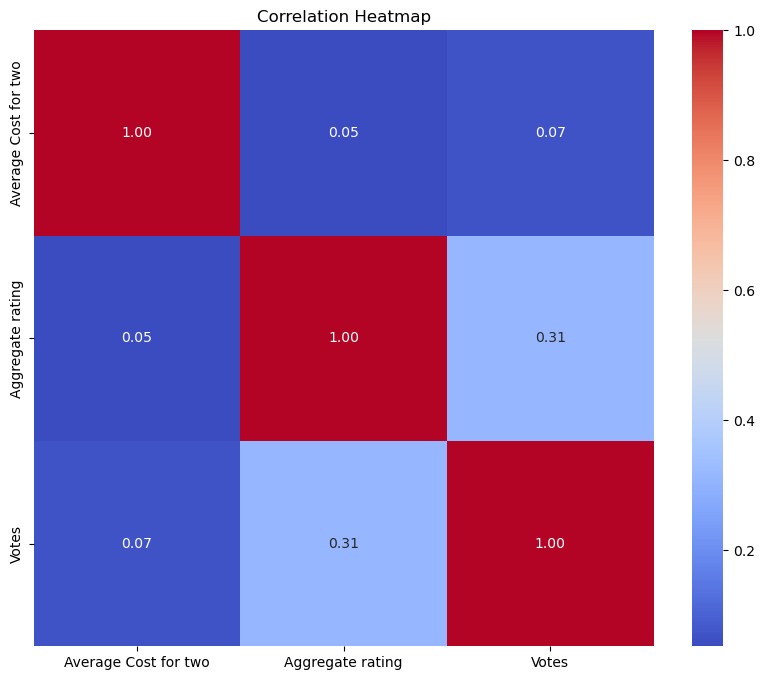

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = zomato_merged[['Average Cost for two', 'Aggregate rating', 'Votes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Observations and Insights
##### 1. Most restaurants are located in India (as per the dataset).
##### 2. Top cuisines include Italian, Chinese, and North Indian.
##### 3. Price range has a slight correlation with aggregate ratings.
##### 4. Online delivery is most prevalent in India and UAE.